<a href="https://colab.research.google.com/github/rubengamarro/practicas_aprendizaje_no_supervisado/blob/main/2_Reduccion_de_dimensionalidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EJERCICIO 1

In [224]:
import pandas as pd
import numpy as np

In [225]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X_ejer1 = data.data
y_ejer1 = data.target

In [226]:
from sklearn.model_selection import train_test_split
X_ent, X_test, y_ent, y_test = train_test_split(X_ejer1, y_ejer1, test_size=0.3, stratify=y_ejer1, random_state=0)

**Apartado a**

In [227]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_ent_std = sc.fit_transform(X_ent)
X_test_std = sc.transform(X_test)

In [228]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_ent_std)

PCA()

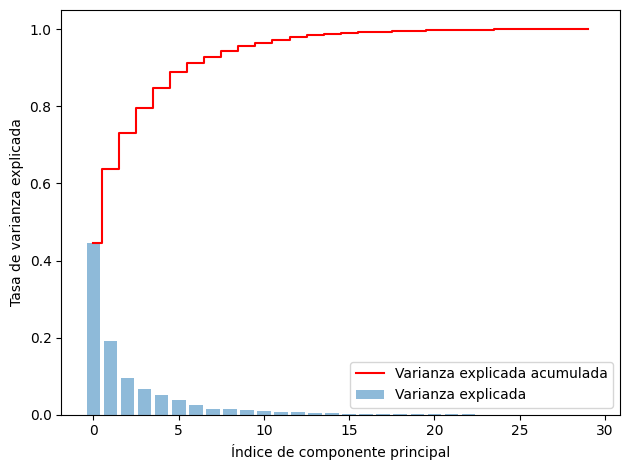

In [229]:
import matplotlib.pyplot as plt

#Calculamos varianza explicada y varianza explicada acumlada
var_exp = pca.explained_variance_ratio_
var_exp_acum = np.cumsum(var_exp)

#Dibujamos
plt.bar(range(0, X_ent_std.shape[1]), var_exp, alpha=0.5, align='center',
        label='Varianza explicada')
plt.step(range(0, X_ent_std.shape[1]), var_exp_acum, where='mid',
         label='Varianza explicada acumulada', color='r')
plt.ylabel('Tasa de varianza explicada')
plt.xlabel('Índice de componente principal')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

**Apartado b**

In [230]:
#Modelo original
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_orig = SVC(gamma='auto')
svm_orig.fit(X_ent_std, y_ent)
exact_orig = accuracy_score(y_test, svm_orig.predict(X_test_std))
print('Exactitud en test original: %.3f'%exact_orig)

Exactitud en test original: 0.953


In [231]:
#Modelo LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()
X_ent_lda = lda.fit_transform(X_ent_std, y_ent)
X_test_lda= lda.transform(X_test_std)
svm_lda = SVC(gamma='auto')
svm_lda.fit(X_ent_lda, y_ent)
exact_lda = accuracy_score(y_test, svm_lda.predict(X_test_lda))
print('Exactitud en test LDA: %.3f'%exact_lda)

Exactitud en test LDA: 0.942


In [232]:
#Modelo PCA
exact_pca = []
for n in range(1, X_ent_std.shape[1] + 1):
    pca = PCA(n_components=n)
    X_ent_pca = pca.fit_transform(X_ent_std)
    X_test_pca = pca.transform(X_test_std)
    svm_pca = SVC(gamma='auto')
    svm_pca.fit(X_ent_pca, y_ent)
    exact = accuracy_score(y_test, svm_pca.predict(X_test_pca))
    exact_pca.append(exact)

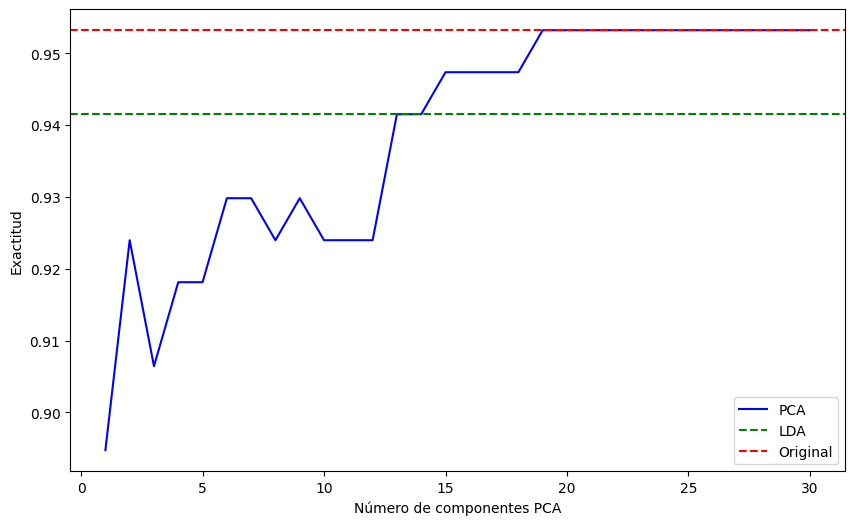

In [233]:
# Dibujo de las exactitudes
plt.figure(figsize=(10,6))
plt.plot(range(1, len(exact_pca)+1), exact_pca, color='blue', label="PCA")
plt.axhline(y=exact_lda, color='green', linestyle='--', label="LDA")
plt.axhline(y=exact_orig, color='red', linestyle='--', label="Original")
plt.xlabel("Número de componentes PCA")
plt.ylabel("Exactitud")
plt.legend()
plt.show()

**Apartado b**

La técnica de dimensionalidad que consigue una mayor exactitud es el PCA, que supera al LDA a partir de 14 componentes e iguala al conjunto original de rasgos a partir de los 19 componentes.
Sí, como ya he dicho el PCA iguala a la exactitud original a partir de 19 componentes.
Si quisiera reducir el tiempo de predicción y mantener una buena exactitud en la predicción utilizaría LDA, ya que su coste computacional es mucho menor y aun así sigue obteniendo una muy buena exactitud (0.94).

#EJERCICIO 2

In [234]:
from sklearn.datasets import load_wine
data = load_wine()
X_ejer2 = data.data

**Apartado a**

In [235]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_ejer2_std = sc.fit_transform(X_ejer2)

In [236]:
pca_ejer2 = PCA(n_components=2)
X_ent_pca2 = pca_ejer2.fit_transform(X_ejer2_std)

**Apartado b**

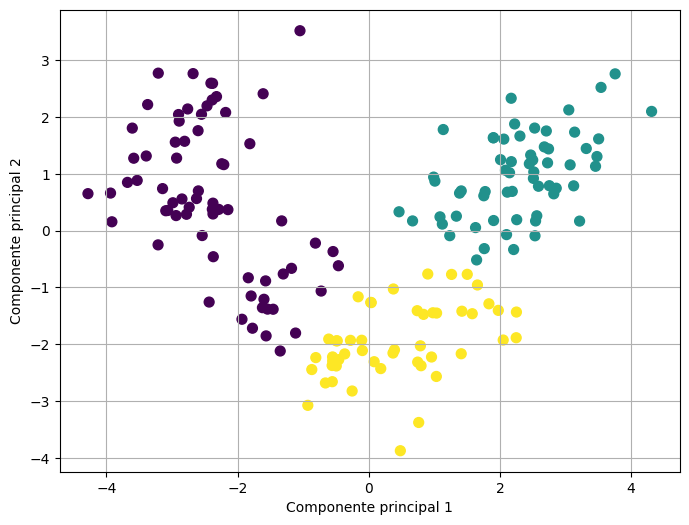

In [237]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='complete')
clusters = clustering.fit_predict(X_ent_pca2)

# Dibujar el resultado
plt.figure(figsize=(8,6))
plt.scatter(X_ent_pca2[:,0], X_ent_pca2[:,1], c=clusters, s=50)
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.grid(True)
plt.show()